In [8]:
!pip install seaborn
!pip install newspaper3k

     |████████████████████████████████| 215kB 2.7MB/s 
     |████████████████████████████████| 194kB 45.9MB/s 
     |████████████████████████████████| 7.4MB 17.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=aaf2434d0593b0271eb109c08c77330ec5aea725970372b854bd732f22132e06
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=1baff6fec0ee9501326f731edae6fa93f90af26bdb0fd28a1ad552bef171189b
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3357 sha256=579ce648d49098a59cf094a17b6504b3535e04ec0ed2cac960960016dc439138
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c757

In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

The next two lines are required to load files from your Google drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# SCRAPER

In [0]:
from newspaper import Article
from newspaper import ArticleException
import newspaper
# from progress.bar import IncrementalBar
import time
import string


def scrape_news_links(url):
    '''
        Scrapes links : not only google but any online vendor.
        set url while calling the function
    '''
    paper = newspaper.build(url, memoize_articles=False)
    links = []
    # bar = IncrementalBar('Scraping Links', max=len(paper.articles), suffix='%(percent)d%%')
    for article in paper.articles:
        links.append(article.url)
        # bar.next()
        time.sleep(0.1)
    # bar.finish()
    
    # print(links)
    return links

def clean_text(text):
    '''
        To clean text
    '''
    # print('cleaning_text')
    # text = text.strip()
    # text = text.lower()
    # for punct in string.punctuation:
    #     text = text.replace(punct, '')
    text = text.lower()
    strin = text.split('\n')
    text = " ".join(strin)
    # text.replace('\\', '')
    exclude = set(string.punctuation)
    text = ''.join(ch for ch in text if ch not in exclude)
    return text

def get_content(links):
    '''
        get headlines and news content
    '''
    # print('getting content')
    content = []
    # next_bar = IncrementalBar('Getting Content', max=)
    # bar = IncrementalBar('Getting content & Cleaning text', max=len(links), suffix='%(percent)d%%' )
    for url in links:
        try:
            article = Article(url, language='en')
            article.download()
            article.parse()
            title = clean_text(article.title)
            news = clean_text(article.text)
            if title != None:
                if news != None: 
                    if news != ' ': 
                        if news != '':      # for sites which news content cannot be scraped
                            content.append([title, news])
            # bar.next()
    
        except ArticleException as ae:
            # if 'Article \'download()\' failed' in ae:
            continue
    
    # bar.finish()
    return content
    

def scraper(link='https://timesofindia.indiatimes.com/'):
    '''
        aggregator function
    '''
    # print('scraper_main')5
    return get_content(scrape_news_links(link))

# if __name__ == "__main__":
    # links = scrape_google_links()
    # print(get_content(links[:15]))

# DF AND CSV

In [0]:
import csv
import pandas as pd



LINKS = ['https://timesofindia.indiatimes.com/', 'https://www.thehindu.com/', 'https://www.bbc.com/news', 'https://www.theguardian.co.uk/']

def create_df(content_list):
    '''
        To write the data to csv file
        takes a list of list where the inner list contains ['headline', 'news']
    '''
    title = []
    news = []
    print('creating_dataFrame')

    for content in content_list:
        title.append(content[0])
        news.append(content[1])
        # keywords.append(content[2])

    data = {'Title' : title, 'News' : news}
    df = pd.DataFrame(data, columns=['Title', 'News'])
    return df


def df_to_csv(df, filename='NewsCluster.csv'):
    '''
        writes dataframe to csv
    '''
    print('writing_to_csv')
    df.to_csv('/content/drive/My Drive/data/' + filename)


def create_csv():
    '''
        aggregator function of this module
    '''
    print('create_csv_main')
    content_list = []
    for link in LINKS:
        content_list.append(scraper(link))

    content_lst = []
    for content in content_list:
        for cont in content:
            content_lst.append(cont)
    # content_lst = scraper()
    # print(content_lst)
    try:
        num = int(input('Enter the number of articles to be stored : '))
        if num < 15:
            raise ValueError('Provide a larger number for dataset')
        df_to_csv(create_df(content_lst[:num]))
    except ValueError as ve:
        df_to_csv(create_df(content_lst))


# CONVERT TO DB

In [0]:
import sqlite3
from sqlite3 import IntegrityError
import csv

def insert_to_db(tup):
    with sqlite3.connect('/content/drive/My Drive/data/NEWS.DB') as con:
        cur = con.cursor()
        cur.execute("INSERT INTO content (headlines, news) VALUES(?, ?);", tup)
        con.commit()

def to_database():
    '''
        converts csv to db
    '''
    with sqlite3.connect('/content/drive/My Drive/data/NEWS.DB') as con:
        cur = con.cursor()
        cur.execute('CREATE TABLE IF NOT EXISTS content(headlines TEXT, news TEXT PRIMARY KEY);')
        with open('/content/drive/My Drive/data/NewsCluster.csv', encoding='utf-8') as fin:
            dr = csv.DictReader(fin)
            for i in dr:
                try:
                    tup = (i['Title'], i['News'])
                    insert_to_db(tup)
                except IntegrityError as ie:
                    # if 'unique constraint' in ie:
                    continue

            # to_db = [(i['Title'], i['News']) for i in dr]
        
        # cur.executemany("INSERT INTO content (headlines, news) VALUES(?, ?);", to_db)
        con.commit()
    con.close()

def print_db():
    '''
        prints database
        used for reference and verification
    '''
    with sqlite3.connect("/content/drive/My Drive/data/NEWS.DB") as con:
        cur = con.cursor()
        cur.execute('SELECT * FROM content')
        return cur.fetchall()

# if __name__ == "__main__":
    '''
    execute either of the functions to update database or displahy the content
    '''
    # to_database()
    # print(print_db()[0])

# CALL SCRAPER, CREATE CSV and DB

In [0]:
create_csv()
to_database()

# CHECK CSV

In [22]:
import csv
def print_csv(filename):
  with open('/content/drive/My Drive/data/'+filename) as csv_file:
      csv_reader = csv.reader(csv_file, delimiter=',')
      for row in csv_reader:
        print(row)

        
if __name__ == '__main__':
    print_csv("NewsCluster.csv")

['', 'Title', 'News']
['0', 'bollywood news latest bollywood gossip actresses actors movies films india', 'living with coronavirus the world will never be the same an']
['1', 'tamil cinema news kollywood news movies celebrities actresses actors films songs videos', 'living with coronavirus the world will never be the same an']
['2', 'mollywood news malayalam cinema news movies celebrities actresses actors films songs videos', 'living with coronavirus the world will never be the same an']
['3', 'hindi tv news check latest news on hindi tv shows tv celebrities  hindi tv serials', 'etimes is an entertainment tv  lifestyle industrys promotional website and carries advertorials and native advertising  copyright © 2020 bennett coleman  co ltd all rights reserved  the times of india']
['4', 'best bollywood films 2020  times of india', '45 5  thappad is a silent slap on our societys ageold belief that — shaadi mein sab kuch chalta hain but honestly should it be that way and that is what we nee

# CLUSTERING

In [0]:
"""
Wrapper for offline clustering methods that do not take into
account temporal aspects of data and online clustering methods
that update and/or predict new data as it comes in. Framework
supports custom text representations (e.g. Continuous Bag of
Words) but will default to tfidf if none are provided.
"""

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from hdbscan import HDBSCAN
from nltk.corpus import stopwords
from scipy.sparse import issparse, vstack
from sklearn.cluster import *
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

nltk_stopwords = stopwords.words('english')


class Cluster:
    """ Clustering methods for text. Be cautious of datasize; in cases
    of large data, KMeans may be the only efficient choice.

    Accepts custom matrices

    Full analysis of methods can be found at:
    http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html

    Usage:
        >> with open('../data/cleaned_text.txt', 'r', encoding='utf8') as f:
               text = f.readlines()
        >> clustering = Cluster(text)
        >> results = clustering('hdbscan', matrix=None, reduce_dim=None,
                                visualize=True, top_terms=False,
                                min_cluster_size=10)
        >> print(results)
    """
    def __init__(self, text):
        """
        Args:
            text: strings to be clustered (list of strings)
        """
        self.text = list(set(text))

    def __call__(self, method, vectorizer=None,
                         reduce_dim=None, viz=False,
                         *args, **kwargs):
        """
        Args:
            method: algorithm to use to cluster data (str)
            vectorizer: initialized method to convert text to np array;
                        assumes __call__ vectorizes the text (Class, optional)
            reduce_dim: reduce dim of representation matrix (int, optional)
            visualize: visualize clusters in 3D (bool, optional)
            *args, **kwargs: see specified method function
        """

        # Make sure method is valid
        assert method in ['hdbscan', 'dbscan', 'spectral',
                          'kmeans', 'affinity_prop', 'agglomerative',
                          'mean_shift', 'birch'], 'Invalid method chosen.'

        if not hasattr(self, 'vectorizer'):
            if vectorizer is None:
                self._init_tfidf()
            else:
                self.vectorizer = vectorizer
                self.matrix = self.vectorizer(self.text)

        # Reduce dimensionality using latent semantic analysis (makes faster)
        if reduce_dim is not None:
            self.matrix = self._pca(reduce_dim, self.matrix)

        # Cache current method
        method = eval('self.' + method)
        self.algorithm = method(*args, **kwargs)
        self.results = self._organize(self.algorithm.labels_)

        # For plotting
        self.viz_matrix = self.matrix

        # Visualize clustering outputs if applicable
        if viz:
            _ = self.viz3D()
            _ = self.top_terms()

        return self.results

    # def hdbscan(self, min_cluster_size=10, prediction_data=False):
    #     """ DBSCAN but allows for varying density clusters and no longer
    #     requires epsilon parameter, which is difficult to tune.
    #     http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
    #     Scales slightly worse than DBSCAN, but with a more intuitive parameter.
    #     """
    #     hdbscan = HDBSCAN(min_cluster_size=min_cluster_size,
    #                         prediction_data=prediction_data)
    #     if prediction_data:
    #         return hdbscan.fit(self._safe_dense(self.matrix))
    #     else:
    #         return hdbscan.fit(self.matrix)

    def dbscan(self, eps=0.50):
        """ Density-based algorithm that clusters points in dense areas and
        distances points in sparse areas. Stable, semi-fast, non-global.
        Scales very well with n_samples, decently with n_clusters (not tunable)
        """
        dbscan = DBSCAN(eps=eps, min_samples=3)
        return dbscan.fit(self.matrix)

    def kmeans(self, n_clusters=10, n_init=5, batch_size=5000):
        """ Partition dataset into n_cluster global chunks by minimizing
        intra-partition distances. Expect quick results, but with noise.
        Scales exceptionally well with n_samples, decently with n_clusters.
        """
        kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                                 init='k-means++',
                                 n_init=n_init,
                                 batch_size=batch_size)
        return kmeans.fit(self.matrix)

    def birch(self, n_clusters=10):
        """ Partitions dataset into n_cluster global chunks by repeatedly
        merging subclusters of a CF tree. Birch does not scale very well to high
        dimensional data. If many subclusters are desired, set n_clusters=None.
        Scales well with n_samples, well with n_clusters.
        """
        birch = Birch(n_clusters=n_clusters)
        return birch.fit(self.matrix)

    def agglomerative(self, n_clusters=10, linkage='ward'):
        """ Iteratively clusters dataset semi-globally by starting with each
        point in its own cluster and then using some criterion to choose another
        cluster to merge that cluster with another cluster.
        Scales well with n_samples, decently with n_clusters.
        """
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters,
                                                linkage=linkage)
        return agglomerative.fit(self._safe_dense(self.matrix))

    def spectral(self, n_clusters=5):
        """ Partitions dataset semi-globally by inducing a graph based on the
        distances between points and trying to learn a manifold, and then
        running a standard clustering algorithm (e.g. KMeans) on this manifold.
        Scales decently with n_samples, poorly with n_clusters.
        """
        spectral = SpectralClustering(n_clusters=n_clusters)
        return spectral.fit(self.matrix)

    def affinity_prop(self, damping=0.50):
        """ Partitions dataset globally using a graph based approach to let
        points ‘vote’ on their preferred ‘exemplar’.
        Does not scale well with n_samples. Not recommended to use with text.
        """
        affinity_prop = AffinityPropagation(damping=damping)
        return affinity_prop.fit(self._safe_dense(self.matrix))

    def mean_shift(self, cluster_all=False):
        """ Centroid-based, global method that assumes there exists some
        probability density function from which the data is drawn, and tries to
        place centroids of clusters  at the maxima of that density function.
        Unstable, but conservative.
        Does not scale well with n_samples. Not recommended to use with text.
        """
        mean_shift = MeanShift(cluster_all=False)
        return mean_shift.fit(self._safe_dense(self.matrix))

    def _init_tfidf(self, max_features=30000, analyzer='word',
                    stopwords=nltk_stopwords, token_pattern=r"(?u)\b\w+\b"):
        """ Default representation for data is sparse tfidf vectors

        Args:
            max_features: top N vocabulary to consider (int)
            analyzer: 'word' or 'char', level at which to segment text (str)
            stopwords: words to remove from consideration, default nltk (list)
        """
        # Initialize and fit tfidf vectors
        self.vectorizer = TfidfVectorizer(max_features=max_features,
                                             stop_words=stopwords,
                                             analyzer=analyzer,
                                             token_pattern=token_pattern)
        self.matrix = self.vectorizer.fit_transform(self.text)

        # Get top max_features vocabulary
        self.terms = self.vectorizer.get_feature_names()

        # For letting user know if tfidf has been initialized
        self.using_tfidf = True

    def viz2D(self, matrix=None,
                plot_kwds={'alpha':0.30, 's':40, 'linewidths':0}):
        """ Visualize clusters in 2D """
        # Run PCA over the data so we can plot
        matrix2D = self._pca(n=2, matrix=self.viz_matrix)

        # Get labels
        labels = np.unique(self.results['labels'])

        # Assign a color to each label
        palette = sns.color_palette('deep', max(labels)+1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]

        # Plot the data
        plt.close()
        fig = plt.figure(figsize=(10,6))
        plt.scatter(matrix2D.T[0],
                    matrix2D.T[1],
                    c=colors,
                    **plot_kwds)
        frame = plt.gca()

        # Turn off axes, since they are arbitrary
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

        # Add a title
        alg_name = str(self.algorithm.__class__.__name__)
        plt.title('{0} clusters found by {1}'.format(len(labels),
                                                     alg_name),
                  fontsize=20)
        plt.tight_layout()
        plt.show()
        return fig

    def viz3D(self, matrix=None):
        """ Visualize clusters in 3D """
        # Run PCA over the data
        matrix3D = self._pca(n=3, matrix=self.viz_matrix)

        # Extract labels from results
        labels = self.results['labels']

        # Assign colors
        palette = sns.color_palette('deep', int(max(labels)+1))
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]

        # Plot the data
        plt.close()
        fig = plt.figure(figsize=(10,6))
        ax = plt.axes(projection='3d')
        ax.scatter(matrix3D.T[0],
                   matrix3D.T[1],
                   matrix3D.T[2],
                   c=colors)

        # Add a title
        alg_name = str(self.algorithm.__class__.__name__)
        plt.title('{0} Clusters | {1} Items | {2}'.format(len(set(labels)),
                                                            matrix3D.shape[0],
                                                            alg_name),
                  fontsize=20)

        # Turn off arbitrary axis tick labels
        plt.tick_params(axis='both', left=False, top=False, right=False,
                        bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
        plt.tight_layout()
        plt.show()
        return fig

    def top_terms(self, topx=10):
        """ Print out top terms per cluster. """
        if self.using_tfidf != True:
            print('For use with non-tfidf vectorizers,try sklearn NearestNeighbors\
            (although NN performs poorly with high dimensional inputs.')
            return None

        # Get labels, sort text IDs by cluster
        labels = self.results['labels']
        cluster_idx = {clust_id: np.where(labels == clust_id)[0]
                       for clust_id in set(labels)}

        # Get centers, stack into array
        centroids = np.vstack([self.viz_matrix[indexes].mean(axis=0)
                                for key, indexes in cluster_idx.items()])

        # Compute closeness of each term representation to each centroid
        order_centroids = np.array(centroids).argsort()[:, ::-1]

        # Organize terms into a dictionary
        cluster_terms = {clust_id: [self.terms[ind]
                                    for ind in order_centroids[idx, :topx]]
                        for idx, clust_id in enumerate(cluster_idx.keys())}

        # Print results
        print("Top terms per cluster:")
        for clust_id, terms in cluster_terms.items():
            words = ' | '.join(terms)
            print("Cluster {0} ({1} items): {2}".format(clust_id,
                                                        len(cluster_idx[clust_id]),
                                                        words))

        return cluster_terms

    def item_counts(self):
        """ Print number of counts in each cluster """
        for key, vals in self.results.items():
            if key == 'labels':
                continue
            print('Cluster {0}: {1} items'.format(key, len(vals)))

    def _organize(self, labels):
        """ Organize text from clusters into a dictionary """
        # Organize text into respective clusters
        cluster_idx = {clust_id: np.where(labels == clust_id)[0]
                       for clust_id in set(labels)}

        # Put results in a dictionary; key is cluster idx values are text
        results = {clust_id: [self.text[idx] for idx in cluster_idx[clust_id]]
                    for clust_id in cluster_idx.keys()}
        results['labels'] = list(labels)

        return results

    def _pca(self, n, matrix):
        """ Perform PCA on the data """
        return TruncatedSVD(n_components=n).fit_transform(matrix)

    def _safe_dense(self, matrix):
        """ Some algorithms don't accept sparse input; for these, make
        sure the input matrix is dense. """
        if issparse(matrix):
            return matrix.todense()
        else:
            return matrix


class OnlineCluster(Cluster):
    """ Online (stream) clustering of textual data. Check each method
    to determine if the model is updating or ad-hoc predicting. These are not
    'true' online methods as they preserve all seen data, as opposed to letting
    data points and clusters fade, merge, etc. over time.

    Usage:
        To initialize:
        >> with open('../data/cleaned_text.txt', 'r', encoding='utf8') as f:
               text = f.readlines()
        >> online = OnlineCluster(method='kmeans', text, visualize=True)

        To predict and update parameters if applicable:
        >> new_text = text[-10:]
        >> online.predict(new_text)
    """
    def __init__(self, text, method, *args, **kwargs):
        """
        Args:
            text: strings to be clustered (list of strings)
            method: algorithm to use to cluster (string)
            *args, **kwargs (optional):
                vectorizer: text representation. Defaults tfidf (array, optional)
                reduce_dim: reduce dim of representation matrix (int, optional)
                visualize: visualize clusters in 3D (bool, optional)
        """
        # Only accept valid arguments
        assert method in ['kmeans', 'birch', 'hdbscan',
                          'dbscan', 'mean_shift'], \
                'Method incompatible with online clustering.'

        # Initialize inherited class
        super().__init__(text)

        # Get initial results
        self.results = self.__call__(method=method, *args,**kwargs)

        # Save args, set method
        self.__dict__.update(locals())
        self.method = eval('self._' + method)

    def predict(self, new_text):
        """ 'Predict' a new example based on cluster centroids and update params
        if applicable (kmeans, birch). If a custom (non-tfidf) text representation
        is being used, class assumes new_text is already in vectorized form.

        Args:
            new_text: list of strings to predict
        """
        # Predict
        assert type(new_text) == list, 'Input should be list of strings.'
        self.text = list(set(self.text + new_text))
        new_matrix = self._transform(new_text)
        output_labels = self.method(new_matrix)

        # Update attribute for results, plotting
        self._update_results(output_labels)
        self.viz_matrix = vstack([self.viz_matrix, new_matrix])
        return output_labels

    def _kmeans(self, new_matrix):
        """ Updates parameters and predicts """
        self.algorithm = self.algorithm.partial_fit(new_matrix)
        return self.algorithm.predict(new_matrix)

    def _birch(self, new_matrix):
        """ Updates parameters and predicts """
        self.algorithm = self.algorithm.partial_fit(new_matrix)
        return self.algorithm.predict(new_matrix)

    def _hdbscan(self, new_matrix):
        """ Prediction only, HDBSCAN requires training to be done on dense
        matrices for prediction to work properly. This makes training
        inefficient, though. """
        try:
            labels, _ = approximate_predict(self.algorithm,
                                            self._safe_dense(new_matrix))
        except AttributeError:
            try:
                self.algorithm.generate_prediction_data()
                labels, _ = approximate_predict(self.algorithm,
                                                self._safe_dense(new_matrix))
            except ValueError:
                print('Must (inefficiently) re-train with prediction_data=True')
        return labels

    def _dbscan(self, new_matrix):
        """ Prediction only """
        # Extract labels
        labels = self.algorithm.labels_

        # Result is noise by default
        output = np.ones(shape=new_matrix.shape[0], dtype=int)*-1

        # Iterate all input samples for a label
        for idx, row in enumerate(new_matrix):

            # Find a core sample closer than EPS
            for i, row in enumerate(self.algorithm.components_):

                # If it's below the threshold of the dbscan model
                if cosine(row, x_core) < self.algorithm.eps:

                    # Assign label of x_core to the input sample
                    output[idx] = labels[self.algorithm.core_sample_indices_[i]]
                    break

        return output

    def _mean_shift(self, new_matrix):
        """ Prediction only, not efficient """
        return self.algorithm.predict(new_matrix)

    def _transform(self, new_text):
        """ Transform text to tfidf representation. Assumes already vectorized
        if tfidf matrix has not been initialized. """
        if self.using_tfidf:
            return self.vectorizer.transform(new_text)
        else:
            return self.vectorizer(new_text)
        return new_matrix

    def _update_results(self, labels):
        """ Update running dictionary """
        new_results = self._organize(labels)
        for key in self.results.keys():
            try:
                self.results[key] += new_results[key]
            except KeyError:
                continue


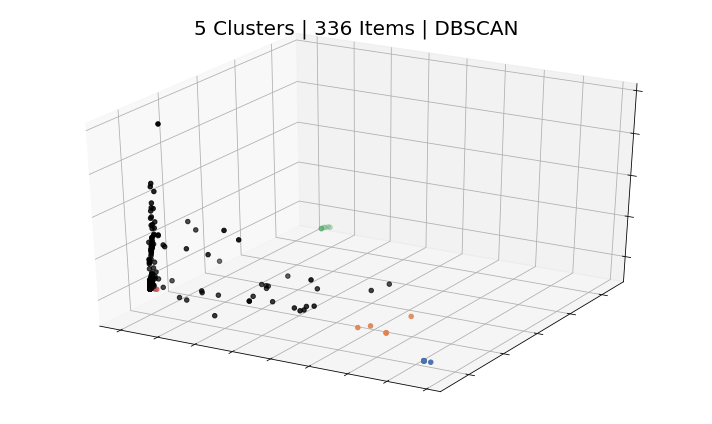

Top terms per cluster:
Cluster 0 (17 items): entertainment | events | politics | latest | news | vijayawada | kozhikode | madurai | kolkata | kochi
Cluster 1 (6 items): updates | live | politics | events | latest | news | kerala | telangana | karnataka | states
Cluster 2 (8 items): 2020 | times | best | films | india | marathi | kannada | telugu | bengali | bollywood
Cluster 3 (4 items): business | technology | sport | family | failures | fairytale | fake | fall | false | fame
Cluster -1 (301 items): coronavirus | video | news | lockdown | us | trump | new | latest | life | world


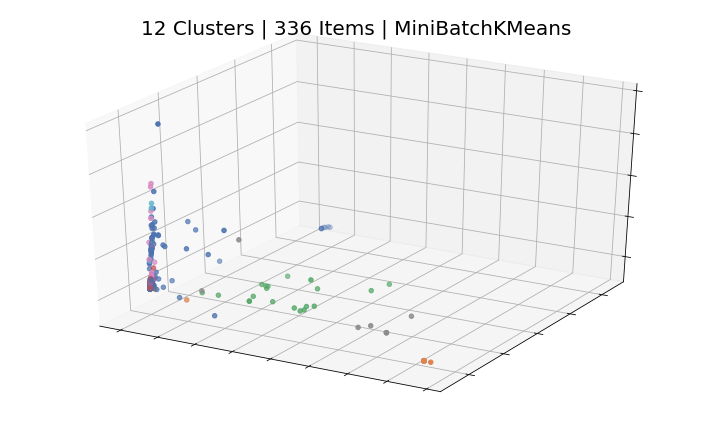

Top terms per cluster:
Cluster 0 (76 items): coronavirus | lockdown | us | video | vaccine | pass | rise | retail | countries | get
Cluster 1 (2 items): watch | stops | charging | customers | netflix | never | unmissable | festival | 11 | digital
Cluster 2 (20 items): news | bbc | latest | india | breaking | videos | world | tv | actresses | actors
Cluster 3 (28 items): us | black | america | tells | trump | canada | aint | voters | biden | protection
Cluster 4 (9 items): new | could | green | age | designs | stone | skill | tracing | contact | ios
Cluster 5 (3 items): business | sport | technology | family | failures | fairytale | fake | fall | false | fame
Cluster 6 (29 items): video | cummings | dominic | trip | lockdown | defends | uk | 260mile | bolsonaro | brazil
Cluster 7 (8 items): updates | live | politics | latest | events | news | england | kerala | karnataka | telangana
Cluster 8 (5 items): covid19 | dangerous | mutate | virus | smiles | trials | unit | graveyard | called |

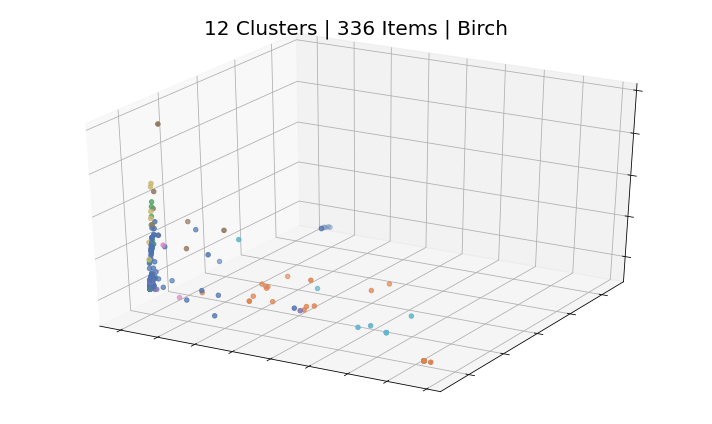

Top terms per cluster:
Cluster 0 (220 items): coronavirus | video | times | best | films | 2020 | india | new | covid19 | global
Cluster 1 (16 items): news | bbc | india | world | latest | breaking | movies | actresses | actors | local
Cluster 2 (17 items): lockdown | life | video | animals | coronavirus | couples | women | faces | one | changed
Cluster 3 (5 items): guardian | securely | contact | book | subscription | puzzles | faqs | ios | introducing | android
Cluster 4 (5 items): business | technology | sport | products | announcements | gadgets | news | breaking | updates | events
Cluster 5 (9 items): coronavirus | retail | countries | stories | map | glance | state | cases | recession | latest
Cluster 6 (14 items): trump | black | donald | reopening | mask | voters | aint | biden | governors | cameras
Cluster 7 (6 items): crash | plane | pakistan | survivor | karachi | fire | smoke | see | could | escape
Cluster 8 (6 items): cummings | dominic | lockdown | trip | 260mile | defend

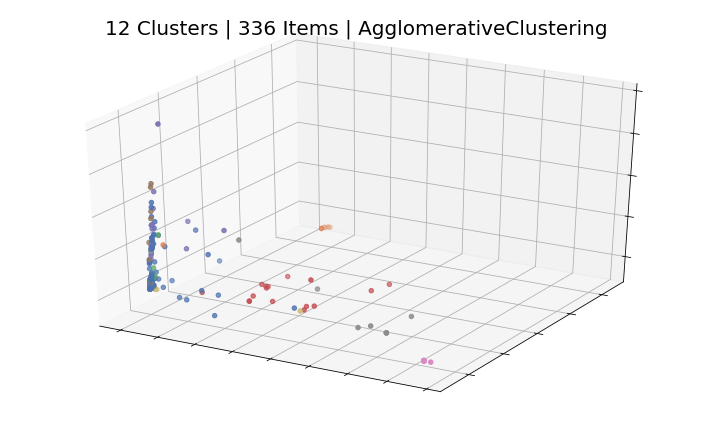

Top terms per cluster:
Cluster 0 (209 items): video | coronavirus | lockdown | new | life | guardian | covid19 | america | people | watch
Cluster 1 (17 items): trump | global | black | donald | voters | aint | hydroxychloroquine | biden | car | governors
Cluster 2 (17 items): us | canada | tells | parks | firm | rental | protection | national | hertz | bankruptcy
Cluster 3 (16 items): news | bbc | india | world | latest | breaking | movies | actresses | actors | local
Cluster 4 (19 items): coronavirus | might | vaccine | retail | countries | stories | map | children | glance | state
Cluster 5 (6 items): cummings | dominic | lockdown | trip | 260mile | defends | coronavirus | timeline | durham | unwise
Cluster 6 (17 items): entertainment | events | politics | latest | news | vijayawada | kozhikode | madurai | kolkata | kochi
Cluster 7 (8 items): updates | latest | live | politics | events | news | england | india | kerala | karnataka
Cluster 8 (8 items): business | technology | quaranti

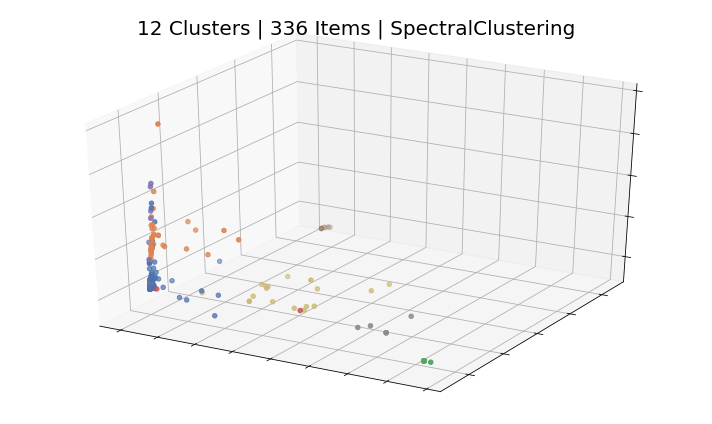

Top terms per cluster:
Cluster 0 (214 items): video | us | lockdown | global | trump | guardian | new | pictures | life | covid19
Cluster 1 (48 items): coronavirus | us | vaccine | latest | retail | countries | stories | live | map | children
Cluster 2 (17 items): entertainment | events | politics | latest | news | vijayawada | kozhikode | madurai | kolkata | kochi
Cluster 3 (5 items): business | technology | sport | products | announcements | gadgets | news | breaking | updates | events
Cluster 4 (6 items): cummings | dominic | lockdown | trip | 260mile | defends | coronavirus | timeline | durham | unwise
Cluster 5 (8 items): 2020 | times | best | films | india | marathi | kannada | telugu | bengali | bollywood
Cluster 6 (6 items): crash | plane | pakistan | survivor | karachi | fire | smoke | see | could | escape
Cluster 7 (6 items): updates | live | politics | events | latest | news | kerala | telangana | karnataka | states
Cluster 8 (18 items): news | bbc | india | latest | videos 

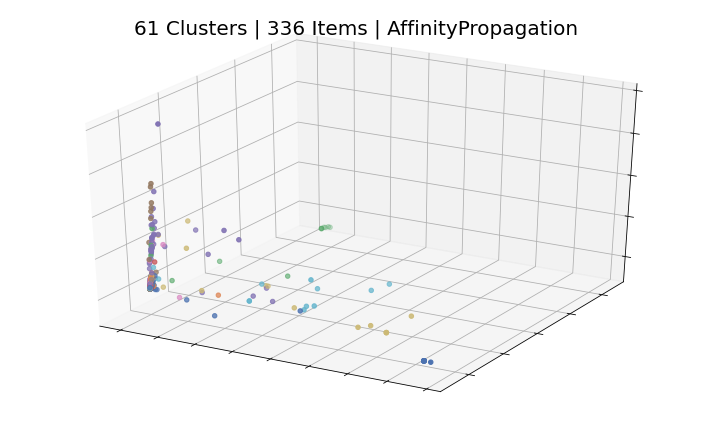

Top terms per cluster:
Cluster 0 (4 items): netflix | customers | watch | charging | stops | never | 11 | unmissable | hay | festival
Cluster 1 (8 items): us | canada | companies | boredom | creativity | spark | mysterious | civilisation | desert | plague
Cluster 2 (3 items): special | reports | water | greenlanders | documentary | open | crisis | climate | migrants | hurl
Cluster 3 (4 items): time | economic | target | growth | scraps | annual | irish | sea | johnsons | border
Cluster 4 (5 items): new | antarctica | green | meteorite | find | remain | youthful | eternally | could | designs
Cluster 5 (3 items): mission | launch | spacex | nasa | questions | crew | cleared | racism | accusations | lana
Cluster 6 (3 items): finally | northern | ireland | bees | getting | break | singapore | quizzer | 10k | tony
Cluster 7 (4 items): science | environment | reality | dreams | mean | check | sourdough | bread | making | zuckerberg
Cluster 8 (4 items): countries | map | state | cases | coron

In [41]:


from matplotlib import pyplot as plt
import pandas as pd
import string

cluster_dict = {2:'dbscan', 3:'spectral', 4:'kmeans', 5:'affinity_prop', 6:'agglomerative', 7:'mean_shift', 8:'birch'}

def clean(text):
    '''
        Clean text before running clusterer
    '''
    text = text.strip()
    text = text.lower()
    for punct in string.punctuation:
        text = text.replace(punct, ' ')
    lst = text.split()
    text = " ".join(lst)
    for t in text:
        if t not in string.printable:
            text = text.replace(t, '')
    return text

def clust():
    df = pd.read_csv('/content/drive/My Drive/data/NewsCluster.csv')
    data = df["Title"].tolist()

    for dt in data:
        data[data.index(dt)] = clean(dt)

    data = pd.DataFrame(data, columns=["text"])
    data['text'].dropna(inplace=True)

    # %matplotlib inline


    clustering = Cluster(data.text)
    results = clustering(method='dbscan', vectorizer=None, 
                        reduce_dim=None, viz=True, eps=0.9)
    
    results = clustering(method='kmeans', vectorizer=None, 
                        reduce_dim=None, viz=True, n_clusters=12)
    
    results = clustering(method='birch', vectorizer=None, 
                        reduce_dim=None, viz=True, n_clusters=12)
    
    results = clustering(method='agglomerative', vectorizer=None, 
                        reduce_dim=None, viz=True, n_clusters=12)
    
    results = clustering(method='spectral', vectorizer=None, 
                        reduce_dim=None, viz=True, n_clusters=12)
    
    results = clustering(method='affinity_prop', vectorizer=None, 
                        reduce_dim=None, viz=True, damping=0.5)
    
    
    # clustering = Cluster(data.text)
    # for i in range(2,9):
    #     print(cluster_dict[i])
    #     if i == 4:
    #         result = clustering(cluster_dict[i])
    #     else:
    #         result = clustering(cluster_dict[i])
        
    #     print(result)

clust()



